In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
Titanic=pd.read_csv('titanic-data.csv')

In [6]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Questions:
#### question 1: what's the maximum and minimum age of passenger on Titanic?
#### question 2: Are passengers willing to bring more siblings/spouses or parents/children with them？
#### question 3: what factors made people more likely to survive?
#### question 4: what relationship between each variable and survived?

# Data Wrangling:


In [7]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From this function, we can see first 5 lines from data. We can clearly see that this table includes 12 different columns which is PassengerID, Survived, Pclasee,Name,Sex,Age,Sibsp,Parch Ticket,Fare,Cabin and Embarked.

In [8]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


After we quuick review the data, we wants to see the data type and if there's any missing date. From the function above, we could clearly see that there're 3 different data types and total 891 rows in this data. We can also see that there's some missing data in Age, Cabin and embarked, which we might need to correct. 177 age information,687 cabin information and 2 embarked information are missing in this data.

In [9]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now, let's look at some statistic information for Titanic data. It looks like there're total 891 passengers on ship. The average survival rate is about 38%。 Most passengers are in middle and lower class for ticket class. The mean of sublings and spouses is 0.52, which means almost half of the passengers brought at least one of their sibling on ship. The mean of parent and child is 0.38,which is lower than mean of sublings and spouses. Most passengers did not travel with parents or children.It looks like passengers are more willing to bring their spouses and siblings for this trip. The average fare is 32.20.

In [10]:
Titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rouse, Mr. Richard Henry",male,1601,B96 B98,S
freq,1,577,7,4,644


Names are unique in this data. However, ticket and cabin have dupilicates, which means probably passengers shared cabin or they own family tickets. Embarked has 3 different values. Most passengers came from S, which is Southampton.

In [11]:
#now let's handle some missing values in data:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Missing values on Embarked: we can see there're two missing values. let's find out.
Titanic[Titanic.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']]

,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


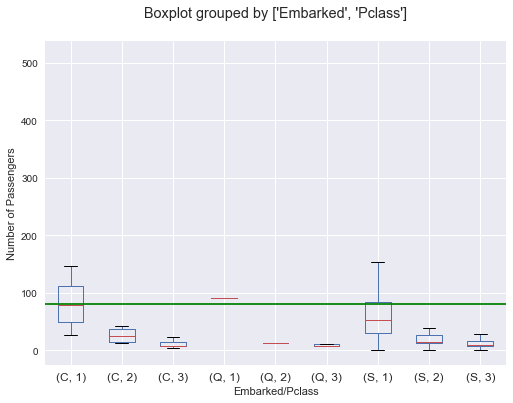

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax = Titanic.boxplot(column='Fare', by=['Embarked','Pclass'], ax=ax)
plt.axhline(y=80, color='green')
plt.xlabel('Embarked/Pclass')
plt.ylabel('Number of Passengers')
ax.set_title('', y=1.1)

From the above chart, we could see that we can use C to replace NA since most people who had Pclass 1 and Fare 80 is Embarked C.

In [14]:
_ = Titanic.set_value(Titanic.Embarked.isnull(), 'Embarked', 'C')

In [15]:
#Missing values on Ages:
Titanic[Titanic.Age.isnull()][['Name', 'Age']]

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
29,"Todoroff, Mr. Lalio",NaN
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN
32,"Glynn, Miss. Mary Agatha",NaN
36,"Mamee, Mr. Hanna",NaN
42,"Kraeff, Mr. Theodor",NaN


In [16]:
#There are 177 missing ages in this data. we will use random values that are within 1
#stardard deviation of the mean to fill these values manually.
mean = Titanic['Age'].mean()
std = Titanic['Age'].std()

replace_nan = lambda x: np.random.randint(mean-std, mean+std) if np.isnan(x) else x

Titanic['Age2'] = Titanic['Age'].apply(replace_nan)

In [17]:
Titanic['Age2']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     26.0
18     31.0
19     35.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     43.0
27     19.0
28     32.0
29     27.0
       ... 
861    21.0
862    48.0
863    43.0
864    24.0
865    42.0
866    27.0
867    31.0
868    33.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    18.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age2, dtype: float64

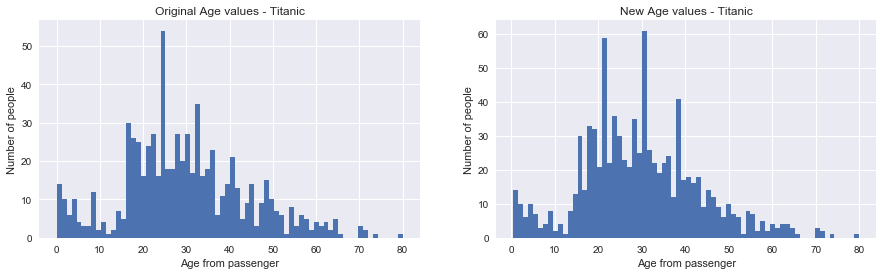

In [18]:
#we will use Age2 for future use and visulaisation purpose:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis1.set_xlabel('Age from passenger')
axis1.set_ylabel('Number of people')
axis2.set_title('New Age values - Titanic')
axis2.set_xlabel('Age from passenger')
axis2.set_ylabel('Number of people')

Titanic['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
Titanic['Age2'].hist(bins=70, ax=axis2)


In [19]:
#adding back Age2 to orginal chart, so new table will have no missing age values.
Titanic.drop('Age', axis=1, inplace=True)
Titanic.rename(columns={'Age2': 'Age'}, inplace=True)
   
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


# Data Exploration:

In [20]:
#now we will see the max and min age for all passengers.
Titanic['Age'].max()

80.0

In [21]:
Titanic['Age'].min()

0.41999999999999998

In [22]:
#Before we start to calculate the correlation between each variables, we needs to convert sex to numbers. It will be
#easier for me to do calculation later. Now we suppose 'male' is 0 and 'female' is 1.
Titanic[['Survived','Sex']]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
5,0,male
6,0,male
7,0,male
8,1,female
9,1,female


In [23]:
def adjust_sex_to_numbers(n):
    if n=='male':
        n=0
    elif n=='female':
        n=1
    else:
        n=n
    return n

In [24]:
Titanic['Sex'].apply(adjust_sex_to_numbers)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, dtype: int64

In [25]:
#now, let start calculate correlation for each variables:
def correlation(x,y):
    a=(x-x.mean())/x.std(ddof=0)
    b=(y-y.mean())/y.std(ddof=0)
    return (a*b).mean()

In [26]:
sex=Titanic['Sex'].apply(adjust_sex_to_numbers)
survive=Titanic['Survived']
class1=Titanic['Pclass']
age=Titanic['Age']
sibsp=Titanic['SibSp']
parch=Titanic['Parch']
fare=Titanic['Fare']

In [27]:
correlation(survive,sex)

0.5433513806577474

In [28]:
correlation(survive,class1)

-0.33848103596101325

In [29]:
correlation(survive,age)

-0.06069717649100833

In [30]:
correlation(survive,sibsp)

-0.03532249888573573

In [31]:
correlation(survive,parch)

0.08162940708348272

In [32]:
correlation(survive,fare)

0.2573065223849616

From the calculation above we could clearly see that survive are more related to sex, fare. Let's make some further explore on these variables.
# Data Visualisation:
### Age:

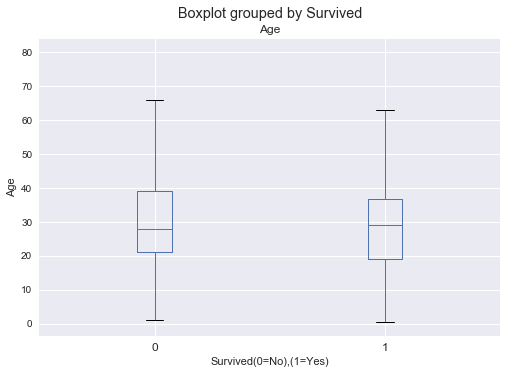

In [33]:
Titanic[['Age','Survived']].boxplot(by="Survived")
plt.xlabel('Survived(0=No),(1=Yes)')
plt.ylabel('Age')
plt.show()

C:\Users\hi33h\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


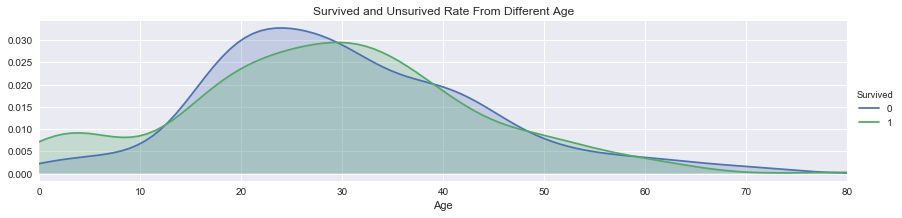

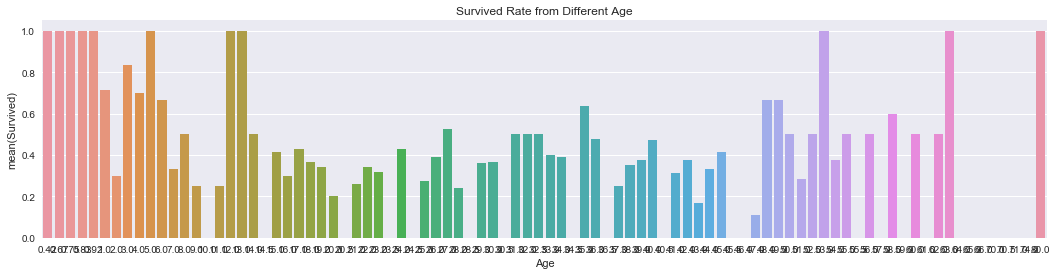

In [34]:
facet = sns.FacetGrid(Titanic, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, Titanic['Age'].max()))
plt.title('Survived and Unsurived Rate From Different Age')
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = Titanic[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)
axis1.set_title('Survived Rate from Different Age')

From chart above we could see that survived rate reach the peak for passenger about 30 years old. And not survived passengers reached peak between 20-27 years old.

### Sex

In [35]:
Titanic.groupby('Sex').mean()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age
Sex,,,,,,,
female,431.028662,0.742038,2.159236,0.694268,0.649682,44.479818,28.060510
male,454.147314,0.188908,2.389948,0.429809,0.235702,25.523893,30.468232


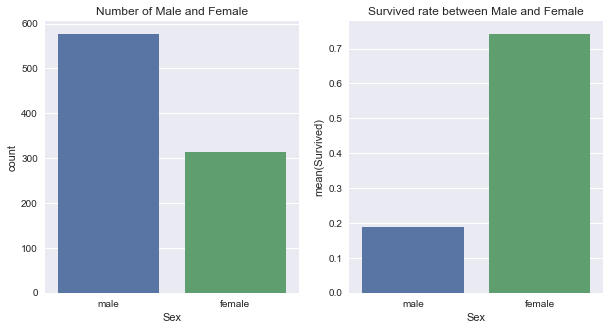

In [36]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
axis1.set_title('Number of Male and Female')
axis2.set_title('Survived rate between Male and Female')

sns.countplot(x='Sex', data=Titanic, ax=axis1)

# average of survived for each Person(male, female)
person_perc = Titanic[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean()
sns.barplot(x='Sex', y='Survived', data=person_perc, ax=axis2, order=['male','female'])

From charts above, we cold see that female had much higher survived rate, which is more than 50%. Even through we could see that acutally more male on this ship than female.
### Pclass

In [37]:
Titanic.groupby('Pclass').mean()

,PassengerId,Survived,SibSp,Parch,Fare,Age
Pclass,,,,,,
1,461.597222,0.629630,0.416667,0.356481,84.154687,37.122315
2,445.956522,0.472826,0.402174,0.380435,20.662183,29.792554
3,439.154786,0.242363,0.615071,0.393075,13.675550,26.254420


This table shows that Class 1 have a higher survived rate, which is more than 62% and Class 3 has lowest rate 24%
### Sibsp

In [38]:
tempdf1 = Titanic[['SibSp', 'Survived']].groupby('SibSp').count().merge(Titanic[['SibSp', 'Survived']].groupby('SibSp').mean(), right_index = True, left_index = True)
tempdf1.columns = ['Count', 'Prob. Survived']
tempdf1

,Count,Prob. Survived
SibSp,,
0,608,0.345395
1,209,0.535885
2,28,0.464286
3,16,0.250000
4,18,0.166667
5,5,0.000000
8,7,0.000000


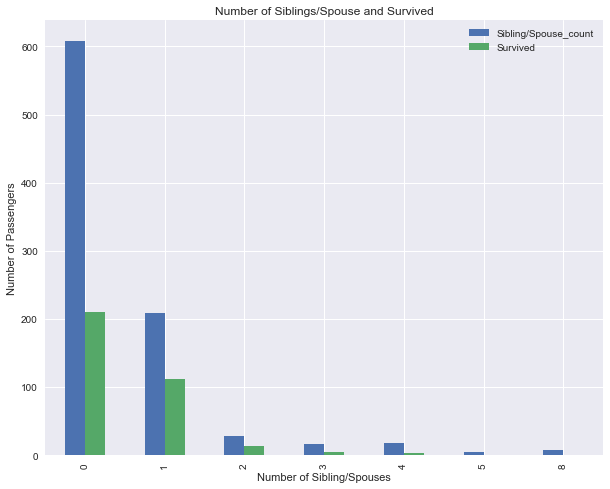

In [39]:
tempdf12 = Titanic[['SibSp', 'Survived']].groupby('SibSp').count().merge(Titanic[['SibSp', 'Survived']].groupby('SibSp').sum(), right_index = True, left_index = True)
tempdf12.columns =['Sibling/Spouse_count','Survived']
tempdf12.plot.bar(figsize = (10, 8))
plt.title('Number of Siblings/Spouse and Survived')
plt.xlabel('Number of Sibling/Spouses')
plt.ylabel('Number of Passengers')
plt.show()

From two charts above, we could see the relationship between SibSp and survived. It looks like passengers with 1 or 2 sibsp has higher survivral rate. However, most people do not have sibling or spouse. And they only had survival rate 34%.
### Parch

In [40]:
tempdf2 = Titanic[['Parch', 'Survived']].groupby('Parch').count().merge(Titanic[['Parch', 'Survived']].groupby('Parch').mean(), right_index = True, left_index = True)
tempdf2.columns = ['Count', 'Ratio. Survived']
tempdf2

,Count,Ratio. Survived
Parch,,
0,678,0.343658
1,118,0.550847
2,80,0.500000
3,5,0.600000
4,4,0.000000
5,5,0.200000
6,1,0.000000


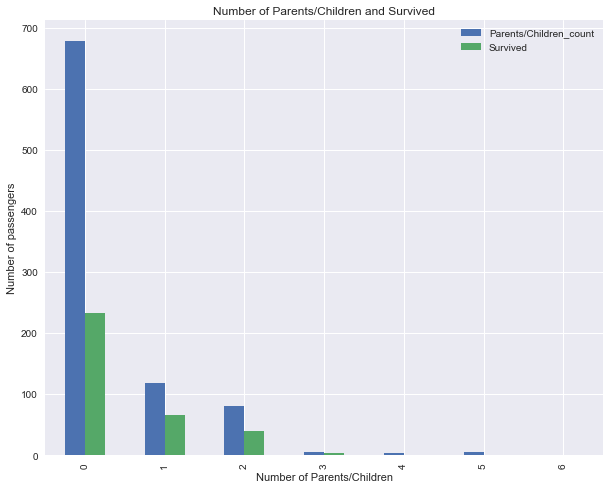

In [41]:
tempdf22 = Titanic[['Parch', 'Survived']].groupby('Parch').count().merge(Titanic[['Parch', 'Survived']].groupby('Parch').sum(), right_index = True, left_index = True)
tempdf22.columns = ['Parents/Children_count','Survived']
tempdf22.plot.bar(figsize = (10, 8))
plt.title('Number of Parents/Children and Survived')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Number of passengers')
plt.show()

From two charts above, we could see the similar relationship between Parch and survived. It looks like passengers with 1 to 3 Parents or children has higher survivral rate. However, most people do not have Parch. And they only had survival rate 34%.
### Embarked

In [42]:
tempdf3 = Titanic[['Embarked', 'Survived']].groupby('Embarked').count().merge(Titanic[['Embarked', 'Survived']].groupby('Embarked').mean(), right_index = True, left_index = True)
tempdf3.columns = ['Count', 'Ratio. Survived']
tempdf3

,Count,Ratio. Survived
Embarked,,
C,170,0.558824
Q,77,0.389610
S,644,0.336957


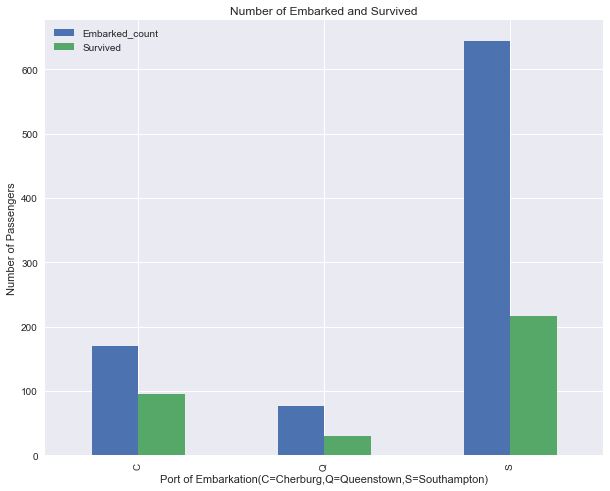

In [43]:
tempdf32 = Titanic[['Embarked', 'Survived']].groupby('Embarked').count().merge(Titanic[['Embarked', 'Survived']].groupby('Embarked').sum(), right_index = True, left_index = True)
tempdf32.columns = ['Embarked_count','Survived']
tempdf32.plot.bar(figsize = (10, 8))
plt.title('Number of Embarked and Survived')
plt.xlabel('Port of Embarkation(C=Cherburg,Q=Queenstown,S=Southampton)')
plt.ylabel('Number of Passengers')
plt.show()

Here we could see the relationship between Embarked and survived. Most passengers came from S, which is Southampton. The passengers with highest survivral rate is from Cherbourg, which rate is 55%.
# Conclusion:

First time when I glanced the data, I'm thinking the survived rate probabaly related to Sex. There're total 891 passengers on ship. Over 6000 are males. The average survival rate is about 38%. And after few research and data exploration, it looks like suvived rate are more related to sex and fare. We compared the rate of survivorship with each variables like sex,class,age fare etc. We used correlation function to calculate the relationship between two variables and try to find the relationship. And we could clearly see that surviorship are more related to sex and fare. The correlation with sex is 0.54 and the correlation with fare is 0.25. So I think during shipwreck,people will protect women and let them leave the ship first, so maybe that's the reson it shows a higher survival rate when the sex is female. And data also shows it related to fareprice. So my guess is that people with higher class and more expensive fare will get betterservices when there's a shipwreck. They probabaly could leave first,too. We also can find the relationship between other variables and survival rates.It looks that passenger with 1 or 2 siblings or spouses tend to have a higher survival rate. Passengers with more than 5 siblings, the survival rate is 0. And the data in passengers with parents or children chart shows the similar trend. Passengers with 1-3 parents or children tend to have a higher survival rate. And once passengers has more than 4 Parents or children, the suvival rate trend to 0. We also could find that most passengers came from Southampton. However, passengers from cherbourg tend to have a higher survival rate. Most passengers are in middle and lower class for ticket class. The mean of sublings and spouses is 0.52, which means almost half of the passengers brought at least one of their sibling on ship. The mean of parent and child is 0.38,which is lower than mean of sublings and spouses. It looks like passengers are more willing to bring their spouses and siblings for this trip. The average fare is 32.20.
Since some age,cabin and embarked information are missing in this data, so we could not make more accurate prediction based on this data. And when I read Titanic story on website, I was told the survived rate is only about 31% and more than 2000 adults on the boat. So I'm thinking there's some missing informtion, either in survived or number of passengers. And I was interested to reserch more on relationship between survived and wealthy people on the ship. I guess they probably will have a better survival rate.

# reference:
#### Kaggle.com/c/titanic/kernels   Feature enginerring and serveral ML algos  by Krishanu Das Baksi
#### Kaggle.com/c/titanic/kernels   Titanic Data Science Solutions   by qwer
#### Kaggle.com/c/titanic/kernels   Exploratory Tutorial-Titanic    by Shorey